# Testing Loop

După ce am rulat codul prin care antrenăm un model timp de mai multe epoci, este momentul să aflăm și cum anume putem să evaluăm un model. Pastul acesta de evaluare a modelului poartă denumirea de 'testing loop'. O să ne creem această secțiune de testare tot în cadrul buclei de antrenare. Înainte de asta, să ne creem din nou setul de date, să creem un model și să antrenăm acel model

In [1]:
# importing the libraries
import torch
from torch import nn

import matplotlib.pyplot as plt

In [2]:
# creating the dataset
start = 0
end = 1
step = 0.02

# creating the 'knows' parameters
weight = 0.7
bias = 0.3

# creating the features
X = torch.arange(start, end, step).unsqueeze(dim=-1)

# creating the labels
y = weight * X + bias

# splitting the data into train set and test set
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# printing the lenght of the train set and test set
print(f'Lenght of train set Features: {len(X_train)}')
print(f'Lenght of train set labels: {len(y_train)}')

print(f'Lenght of test set Features: {len(X_test)}')
print(f'Lenght of test set labels: {len(y_test)}')

Lenght of train set Features: 40
Lenght of train set labels: 40
Lenght of test set Features: 10
Lenght of test set labels: 10


In [5]:
# visualize the data with a help of a function and matplotlib

def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
    ):
    # creating a figure
    plt.figure(figsize=(10, 7))

    # plotting the training data in blue
    plt.scatter(train_data, train_labels, c="b", s=5, label="Training Data")

    # plotting the test data in green
    plt.scatter(test_data, test_labels, c="g", s=5, label="Test Data")

    # checking if we have predictions
    if predictions is not None:
        # plotting the predictions in red
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

    # displaying the legend
    plt.legend() 

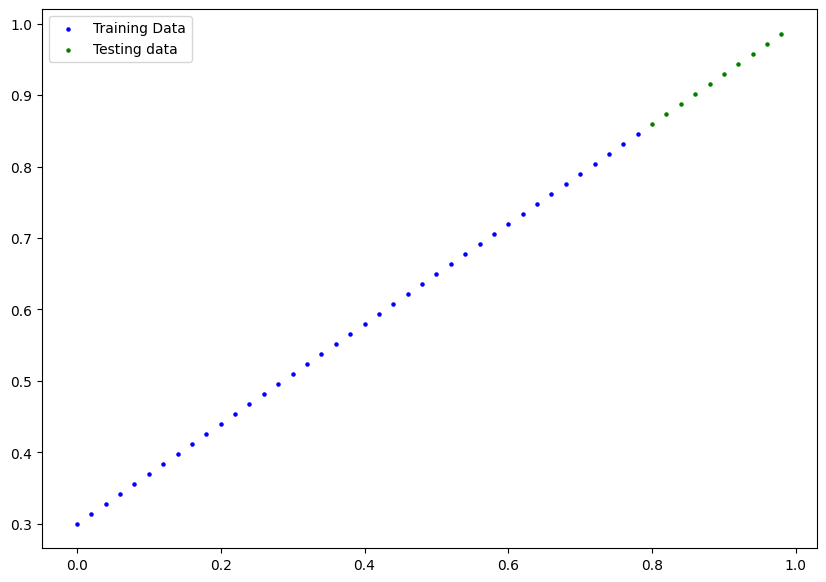

In [4]:
plot_predictions()

In [9]:
# creating a model
class LinearRegressionModel(nn.Module):
    # all models must inherite the nn.Module modul from torch

    # creating the constructor of the class
    def __init__(self):
        # it also must inherit the constructor of the class interited
        super().__init__()

        # creating the parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    # overwriting the forward() method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # all models should overwrite the forward() method
        # this is where we specify what computation need to be made by the model
        return self.weight * x + self.bias


In [10]:
# setting the random seed when creating the model
torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [11]:
# checking the model parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# making predictions without training the model
with torch.inference_mode():
    y_preds = model_0(X_test)


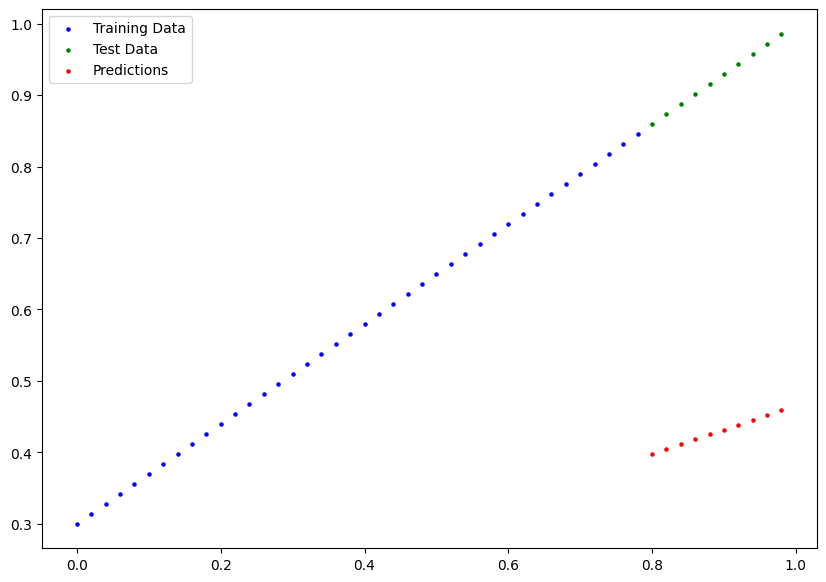

In [13]:
# plotting the predictions
plot_predictions(predictions=y_preds)

In [18]:
# setting up a loss_function and an optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [19]:
# training loop for PyTorch model
# an epoch is one loop through the data

epochs = 1

# Step 1. Looping through the data
for epoch in range(epochs):

    # setting the model to training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

In [20]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3465])), ('bias', tensor([0.1398]))])

La fel cum am pus modelul în modul de antrenare atunci când an creat procesul prin care antrenăm un model, la fel trebuie să facem și acuma. Trebuie să punem acest model în modul de testare, iar asta se face prin comanda `.eval()`. După cum spuneam, o să continuăm cu scriere codului tot în cadrul acelei bucle

In [ ]:
# training loop for PyTorch model
# an epoch is one loop through the data

epochs = 1

# Step 1. Looping through the data
for epoch in range(epochs):

    # setting the model to training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_test)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_test)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

    # TESTING PART

    # putting the model in evaluation model
    model_0.eval()

Pasul următor pe care trebuie să îl facem este să facem din nou acel 'forward pass', însă acesta este un pic diferit. Din moment ce acuma suntem la partea de testare, nu mai avem nevoie de Gradient Descent și de Backpropagation, prin urmare aceste concepte trebuie dezactivate. Acest lucru se face utilizând context managerul **torch.inference_mode()** (cel pe care îl utilizăm pentru a face predicții )

In [ ]:
# training loop for PyTorch model
# an epoch is one loop through the data

epochs = 1

# Step 1. Looping through the data
for epoch in range(epochs):

    # setting the model to training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_train)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

    # TRAINING PART
    # setting the model to evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # Testing Step 1. Forward pass inside inference_mode()
        test_preds = model_0(X_test)

Iar, umrătorul pas este ca și cel de la antrenare, și anume trebuie să calculăm loss-ul pentru acest set de date de testare. Acest lucru se face din nou în cadrul acelui context manager

In [22]:
# training loop for PyTorch model
# an epoch is one loop through the data

epochs = 1

# Step 1. Looping through the data
for epoch in range(epochs):

    # setting the model to training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_train)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

    # TRAINING PART
    # setting the model to evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # Testing Step 1. Forward pass inside inference_mode()
        test_preds = model_0(X_test)

        # Testing Step 1. Caluclating the loss
        test_loss = loss_fn(test_preds, y_test)

Acum că avem totul pregătit, putem să rulăm codul de antrenare și de testare pentru mai multe epoci. O să rulăm acest cod pentru 100 de epoci pentru a vedea ce se întâmplă, cum anume se modifică loss-ul din cadrul testării și din cadrul antrenării. Pentru a vedea mai multe detalii putem să afișăm anumite date odată la 10 epoci, date precum loss-ul de antrenare și cel de testare

In [24]:
# training loop for PyTorch model
# an epoch is one loop through the data

epochs = 100

# Step 1. Looping through the data
for epoch in range(epochs):

    # setting the model to training mode
    model_0.train()

    # Step 1. Forward pass
    y_preds = model_0(X_train)

    # Step 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)

    # Step 3. Optimizer zero grad
    optimizer.zero_grad()

    # Step 4. Backpropagation
    loss.backward()

    # Step 5. Optimizer step
    optimizer.step()

    # TRAINING PART
    # setting the model to evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # Testing Step 1. Forward pass inside inference_mode()
        test_preds = model_0(X_test)

        # Testing Step 1. Caluclating the loss
        test_loss = loss_fn(test_preds, y_test)

    # printing what is happening during training and testing 
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Training Loss: {loss} | Testing loss: {test_loss}') 

Epoch: 0 | Training Loss: 0.18054911494255066 | Testing loss: 0.33607217669487
Epoch: 10 | Training Loss: 0.1690281331539154 | Testing loss: 0.32260122895240784
Epoch: 20 | Training Loss: 0.1575072854757309 | Testing loss: 0.30913046002388
Epoch: 30 | Training Loss: 0.1459864377975464 | Testing loss: 0.2956596314907074
Epoch: 40 | Training Loss: 0.13446560502052307 | Testing loss: 0.2821888327598572
Epoch: 50 | Training Loss: 0.12294475734233856 | Testing loss: 0.26871803402900696
Epoch: 60 | Training Loss: 0.1115618497133255 | Testing loss: 0.2553471624851227
Epoch: 70 | Training Loss: 0.10151924937963486 | Testing loss: 0.24268145859241486
Epoch: 80 | Training Loss: 0.09294335544109344 | Testing loss: 0.23089507222175598
Epoch: 90 | Training Loss: 0.08556082844734192 | Testing loss: 0.2198522537946701


După cum se poate observa din datele printate de mai sus, cu fiecare 10 epoci scade valoarea de la loss function atât pentru setul de date de antrenare cât și pentru cel de testare. Acesta este comportamentul care trebuie să apară atunci când se antrează un model de Deep Learning din PyTorch, valoare funcție de loss function trebuie să fie cât mai apropiată de 0, cu cât mai aproape, cu atât mai bine

## Recapituare

În această secțiune care cuprinde partea de evaluare a modelului am învățat următoarele:

1. Cum să trecem modelul din modul de antrenare în cel de testare:
```python
# assuming we are in the training loop
model_0.eval()
```

2. Următorii pași pe care trebuie să îi facem sunt prezenți și în bucla de antrenare, iar aceștia sunt:

    - Forward pass

    - Calculate the loss

    Diferența aici este faptul că trebuie să dezactivăm partea de gradient descent și backpropagation, iar asta se face cu ajutorul context managerului **with torch.inference_mode()**

```python
import torch
# assuming we are in the training loop

with torch.inferecence_mode():
    test_preds = model_0(X_test)

    test_loss = loss_fn(test_preds, y_preds)
```